#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 28 de setembro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_28set2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(1045816, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045816 entries, 0 to 1045815
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   regiao                  1045816 non-null  object        
 1   estado                  1045599 non-null  object        
 2   municipio               1035834 non-null  object        
 3   coduf                   1045816 non-null  int64         
 4   codmun                  1039740 non-null  float64       
 5   codRegiaoSaude          1035834 non-null  float64       
 6   nomeRegiaoSaude         1035834 non-null  object        
 7   data                    1045816 non-null  datetime64[ns]
 8   semanaEpi               1045816 non-null  int64         
 9   populacaoTCU2019        1041910 non-null  float64       
 10  casosAcumulado          1045816 non-null  int64         
 11  casosNovos              1045816 non-null  int64         
 12  obitosAcumulad

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
843569,Sul,SC,Novo Horizonte,42,421165.0,42003.0,XANXERE,2020-07-26,31,2442.0,5,1,0,0,NaN,NaN,0.0
926479,Sul,RS,Portão,43,431480.0,43007.0,REGIAO 07,2020-06-10,24,37079.0,24,2,1,0,NaN,NaN,1.0
285658,Nordeste,PE,Buíque,26,260280.0,26002.0,ARCOVERDE,2020-04-20,17,58378.0,0,0,0,0,NaN,NaN,0.0
231100,Nordeste,RN,São Bento do Trairí,24,241170.0,24005.0,5ª REGIAO DE SAUDE - SANTA CRUZ,2020-08-24,35,4449.0,50,0,1,0,NaN,NaN,0.0
656274,Sudeste,SP,Guarulhos,35,351880.0,35011.0,ALTO DO TIETE,2020-08-02,32,1379182.0,12427,36,1079,0,NaN,NaN,1.0
314021,Nordeste,PE,Vertentes,26,261620.0,26003.0,CARUARU,2020-07-20,30,20731.0,114,1,2,0,NaN,NaN,0.0
477097,Sudeste,MG,Estrela do Indaiá,31,312470.0,31028.0,BOM DESPACHO,2020-06-04,23,3500.0,0,0,0,0,NaN,NaN,0.0
61604,Norte,AP,Amapá,16,160010.0,16002.0,AREA NORTE,2020-07-05,28,9109.0,346,1,4,0,NaN,NaN,0.0
810363,Sul,PR,Doutor Ulysses,41,412863.0,41002.0,2ª RS METROPOLITANA,2020-04-19,17,5580.0,0,0,0,0,NaN,NaN,1.0
614894,Sudeste,RJ,Sumidouro,33,330570.0,33009.0,SERRANA,2020-05-06,19,15623.0,2,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    35125
RJ    18291
CE     8921
PE     8190
MG     7240
BA     6648
PA     6551
RS     4648
GO     4529
PR     4378
AM     4031
MA     3735
ES     3524
MT     3372
DF     3203
PB     2804
SC     2765
RN     2377
PI     2101
AL     2062
SE     2025
RO     1340
MS     1278
TO      922
AP      704
AC      657
RR      637
Name: obitosAcumulado, dtype: int64

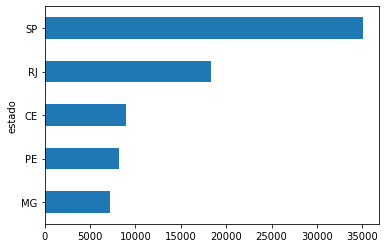

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
df['data'] = df['data'].dt.strftime('%d/%m')

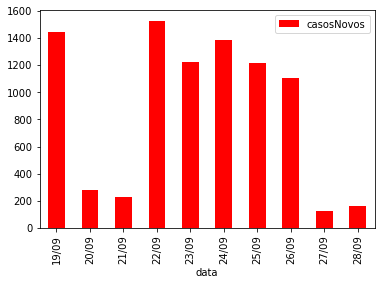

In [9]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

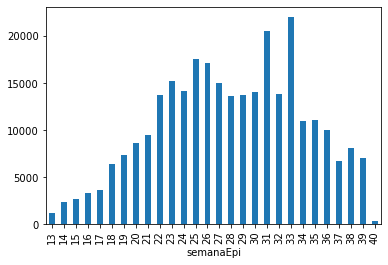

In [10]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

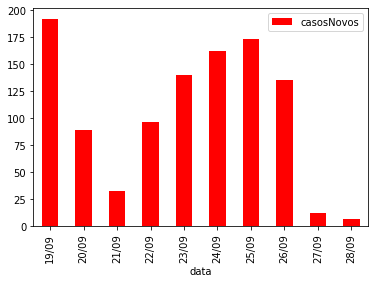

In [11]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

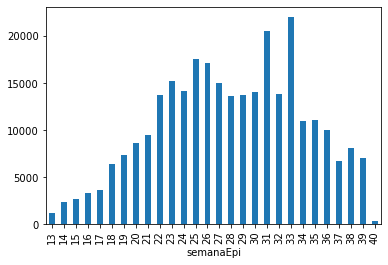

In [12]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')